# Example prediction on a single test image

This notebook gives example code to make a single disparity prediction for one test image.

The file `test_simple.py` shows a more complete version of this code, which additionally:
- Can run on GPU or CPU (this notebook only runs on CPU)
- Can predict for a whole folder of images, not just a single image
- Saves predictions to `.npy` files and disparity images.

In [1]:
from __future__ import absolute_import, division, print_function
%matplotlib inline

import os
import numpy as np
import PIL.Image as pil
import matplotlib.pyplot as plt

import torch
from torchvision import transforms

import networks
from utils import download_model_if_doesnt_exist

import cv2
import numpy as np
import glob

from PIL import Image

## Setting up network and loading weights

In [2]:
model_name = "weights_19"

#download_model_if_doesnt_exist(model_name)
encoder_path = os.path.join("./tmp/kaist_kitti_1/models/", model_name, "encoder.pth")
depth_decoder_path = os.path.join("./tmp/kaist_kitti_1/models/", model_name, "depth.pth")

# LOADING PRETRAINED MODEL
encoder = networks.mpvit_small()
encoder.num_ch_enc = [64,128,216,288,288]
depth_decoder = networks.DepthDecoder()

loaded_dict_enc = torch.load(encoder_path, map_location='cpu')
filtered_dict_enc = {k: v for k, v in loaded_dict_enc.items() if k in encoder.state_dict()}
encoder.load_state_dict(filtered_dict_enc)

loaded_dict = torch.load(depth_decoder_path, map_location='cpu')
depth_decoder.load_state_dict(loaded_dict)

encoder.eval()
depth_decoder.eval();

2023-08-21 14:23:05,363 - mmseg - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: cls_head.cls.weight, cls_head.cls.bias



/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000000.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000001.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000002.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000003.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000004.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000005.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000006.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000007.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000008.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000009.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000010.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000011.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000012.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000013.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000014.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000015.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000016.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000017.jpg
/home/cvml

/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000149.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000150.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000151.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000152.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000153.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000154.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000155.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000156.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000157.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000158.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000159.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000160.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000161.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000162.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000163.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000164.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000165.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000166.jpg
/home/cvml

/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000298.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000299.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000300.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000301.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000302.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000303.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000304.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000305.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000306.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000307.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000308.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000309.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000310.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000311.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000312.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000313.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000314.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000315.jpg
/home/cvml

/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000447.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000448.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000449.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000450.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000451.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000452.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000453.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000454.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000455.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000456.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000457.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000458.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000459.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000460.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000461.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000462.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000463.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000464.jpg
/home/cvml

/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000596.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000597.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000598.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000599.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000600.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000601.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000602.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000603.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000604.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000605.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000606.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000607.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000608.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000609.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000610.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000611.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000612.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000613.jpg
/home/cvml

/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000745.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000746.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000747.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000748.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000749.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000750.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000751.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000752.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000753.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000754.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000755.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000756.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000757.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000758.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000759.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000760.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000761.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000762.jpg
/home/cvml

/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000894.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000895.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000896.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000897.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000898.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000899.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000900.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000901.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000902.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000903.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000904.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000905.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000906.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000907.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000908.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000909.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000910.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000911.jpg
/home/cvml

/home/cvmlserver5/dagyeong/data/rgb/s_9/0000001043.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000001044.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000001045.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000001046.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000001047.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000001048.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000001049.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000001050.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000001051.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000001052.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000001053.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000001054.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000001055.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000001056.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000001057.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000001058.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000001059.jpg
/home/cvmlserver5/dagyeong/data/rgb/s_9/0000001060.jpg
/home/cvml

OpenCV: FFMPEG: tag 0x58564944/'DIVX' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


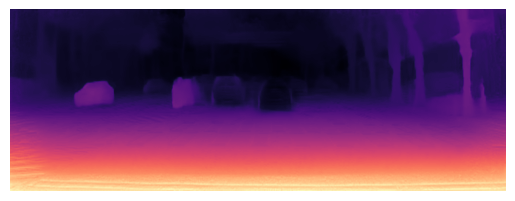

In [5]:
filst = sorted(glob.glob('/home/cvmlserver5/dagyeong/data/rgb/s_9/*.jpg'))
img_array = []
for image_path in filst:
    input_image = pil.open(image_path).convert('RGB')
    original_width, original_height = input_image.size

    feed_height = loaded_dict_enc['height']
    feed_width = loaded_dict_enc['width']
    input_image_resized = input_image.resize((feed_width, feed_height), pil.LANCZOS)

    input_image_pytorch = transforms.ToTensor()(input_image_resized).unsqueeze(0)

    with torch.no_grad():
        features = encoder(input_image_pytorch)
        outputs = depth_decoder(features)

    disp = outputs[("disp", 0)]

    disp_resized = torch.nn.functional.interpolate(disp,
        (original_height, original_width), mode="bilinear", align_corners=False)

    disp_resized_np = disp_resized.squeeze().cpu().numpy()
    vmax = np.percentile(disp_resized_np, 95)

    #plt.subplot(212)
    plt.imshow(disp_resized_np, cmap='magma')
    plt.axis('off')
    plt.savefig('image.png', transparent=True)
    
    img = cv2.imread('image.png')
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
    print(image_path)
    
out = cv2.VideoWriter('test_kitti_kaist_monovit.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 24, size)
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

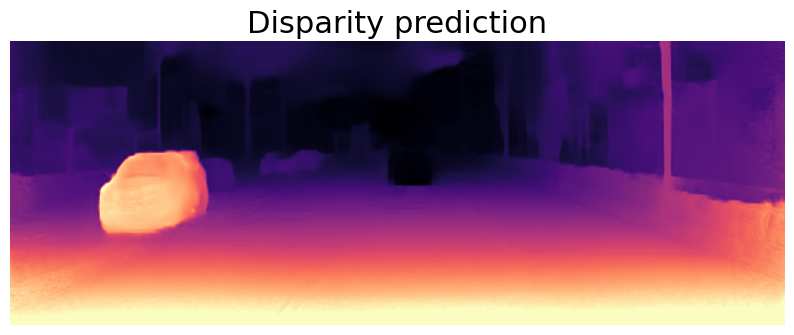

In [5]:
image_path = "/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000422.jpg"

input_image = pil.open(image_path).convert('RGB')
original_width, original_height = input_image.size

feed_height = loaded_dict_enc['height']
feed_width = loaded_dict_enc['width']
input_image_resized = input_image.resize((feed_width, feed_height), pil.LANCZOS)

input_image_pytorch = transforms.ToTensor()(input_image_resized).unsqueeze(0)

with torch.no_grad():
    features = encoder(input_image_pytorch)
    outputs = depth_decoder(features)

disp = outputs[("disp", 0)]

disp_resized = torch.nn.functional.interpolate(disp,
    (original_height, original_width), mode="bilinear", align_corners=False)

disp_resized_np = disp_resized.squeeze().cpu().numpy()
vmax = np.percentile(disp_resized_np, 95)

plt.figure(figsize=(10, 10))

plt.subplot(212)
plt.imshow(disp_resized_np, cmap='magma', vmax=vmax)
plt.title("Disparity prediction", fontsize=22)
plt.axis('off');


## Loading the test image and preprocessing

In [6]:
#image_path = "/home/cvmlserver5/dagyeong/2.jpeg"
image_path = "/home/cvmlserver5/dagyeong/data/rgb/s_9/0000000422.jpg"

input_image = pil.open(image_path).convert('RGB')
original_width, original_height = input_image.size

feed_height = loaded_dict_enc['height']
feed_width = loaded_dict_enc['width']
input_image_resized = input_image.resize((feed_width, feed_height), pil.LANCZOS)

input_image_pytorch = transforms.ToTensor()(input_image_resized).unsqueeze(0)

## Prediction using the PyTorch model

In [7]:
with torch.no_grad():
    features = encoder(input_image_pytorch)
    outputs = depth_decoder(features)

disp = outputs[("disp", 0)]

## Plotting

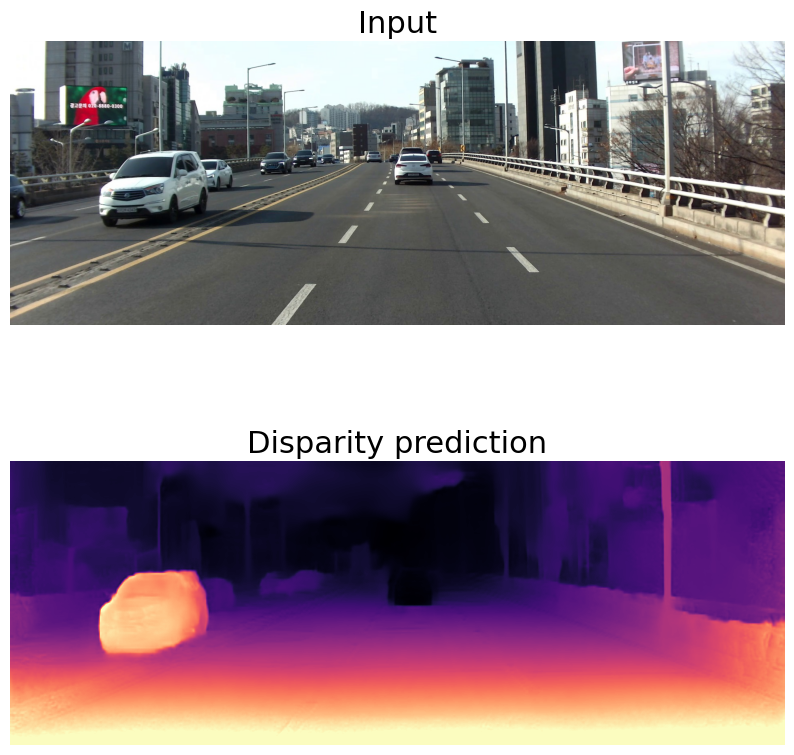

In [8]:
disp_resized = torch.nn.functional.interpolate(disp,
    (original_height, original_width), mode="bilinear", align_corners=False)

# Saving colormapped depth image
disp_resized_np = disp_resized.squeeze().cpu().numpy()
vmax = np.percentile(disp_resized_np, 95)

plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.imshow(input_image)
plt.title("Input", fontsize=22)
plt.axis('off')

plt.subplot(212)
plt.imshow(disp_resized_np, cmap='magma', vmax=vmax)
plt.title("Disparity prediction", fontsize=22)
plt.axis('off');